In [2]:
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualization
# Scikit-Learn for Model Training & Evaluation
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Data preprocessing
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc  # ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report  # Performance metrics

In [3]:
#Step 1 - Load Data 
df=pd.read_csv("iphone_purchase_records.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


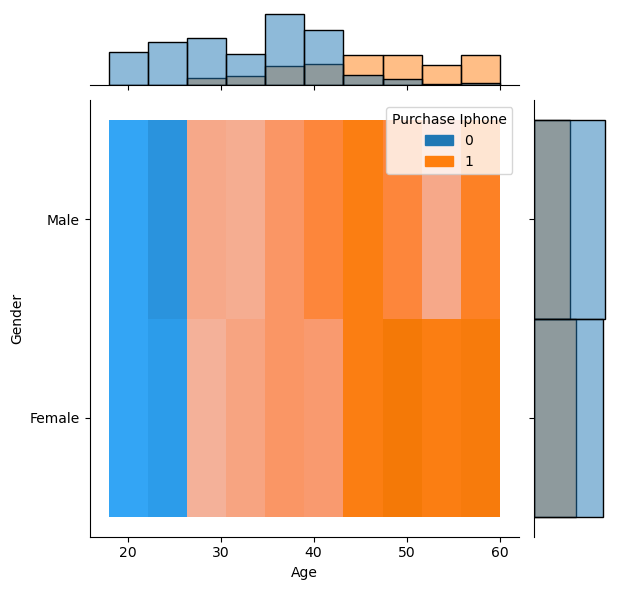

In [4]:
#new addition Joint plot :will give an  idea wether dataset it balenced or imbalenced
sns.jointplot(x='Age', y='Gender', data=df, kind='hist',hue = 'Purchase Iphone')

In [5]:
# Step 2: Convert Gender to Number
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()  
df['Gender'] = label_encoder.fit_transform(df['Gender'])  

df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [6]:
df['Purchase Iphone'].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

In [7]:
X=df[['Gender','Age','Salary']]#scaling preprocessing everything happens on X 
y=df[['Purchase Iphone']]

In [8]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Apply scaling to training data
X_test = scaler.transform(X_test)  # Apply same scaling to test data
#using std scaler cause we arent sure if salary might have heavy outliers or not 

# Naive Bayes : A probabilistic algorithm 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)  


C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes: {accuracy:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes: 0.94
Confusion Matrix:
[[50  2]
 [ 3 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



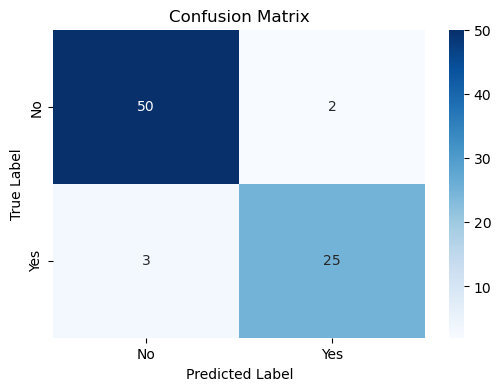

In [13]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Correct way to set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



# Dataset 2

In [15]:
#Step 1 - Load Data 
df=pd.read_csv("LAb dataset 2 loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert all object (categorical) columns to numerical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [18]:
df.columns


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   int32
 3    self_employed             4269 non-null   int32
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   int32
dtypes: int32(3), int64(10)
memory usage: 383.7 KB


In [20]:
X=df.drop(columns = ' loan_status')
y=df[' loan_status']

In [21]:
print("Class Distribution Before SMOTE:\n",y.value_counts())#to check imablence 

Class Distribution Before SMOTE:
  loan_status
0    2656
1    1613
Name: count, dtype: int64


In [22]:
#ro remove this imbalence an oversampleing technique by introducing fakes using SMOTE 
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)

In [23]:
X_resampled.value_counts()


loan_id   no_of_dependents   education   self_employed   income_annum   loan_amount   loan_term   cibil_score   residential_assets_value   commercial_assets_value   luxury_assets_value   bank_asset_value
1        2                  0           0               9600000        29900000      12          778           2400000                    17600000                  22700000              8000000              1
2792     4                  1           1               800000         2800000       16          645           900000                     1400000                   2300000               600000               1
2791     0                  1           1               1000000        3000000       18          382           2200000                    700000                    3500000               900000               1
2790     3                  0           0               6600000        22200000      12          759           8900000                    2200000                   18700

In [24]:
y_resampled.value_counts()


 loan_status
0    2656
1    2656
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

# Splitting the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Apply scaling to training data
X_test = scaler.transform(X_test)  # Apply same scaling to test data
#using std scaler cause we arent sure if salary might have heavy outliers or not #scaling  can improve a numerical data accuracy  with data having different ranges 

In [26]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [27]:
# Predict on test set
y_pred = classifier.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9473189087488241
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       502
           1       0.93      0.97      0.95       561

    accuracy                           0.95      1063
   macro avg       0.95      0.95      0.95      1063
weighted avg       0.95      0.95      0.95      1063

Confusion Matrix:
 [[464  38]
 [ 18 543]]


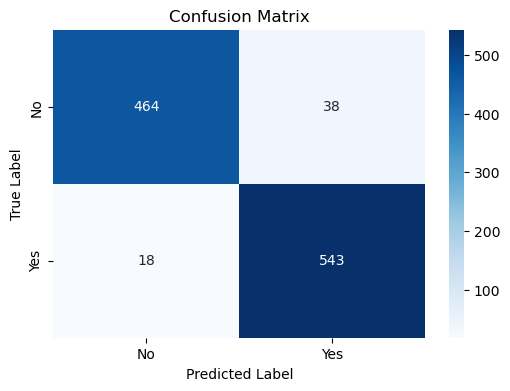

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Correct way to set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [30]:
import numpy as np

print(np.unique(y_test, return_counts=True))  # Shows class distribution


(array([0, 1]), array([502, 561], dtype=int64))


C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


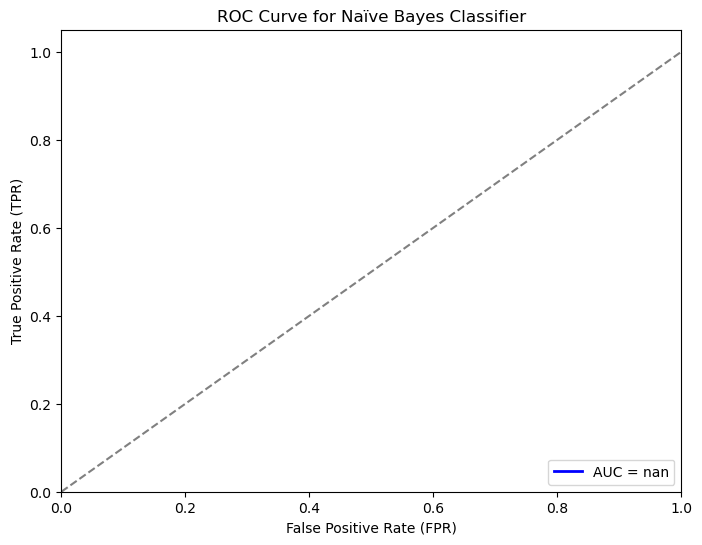

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (loan approved 'Y')
y_probs = classifier.predict_proba(X_test)[:, 1]  # Probabilities for class 'Y'

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Y')

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naïve Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


# Dataset 3

In [33]:
#Step 1 - Load Data 
df=pd.read_csv("Practice dataset BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert all object (categorical) columns to numerical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [35]:
df.columns


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])  

# Defining features and target
X = df.drop(columns=['Attrition_Flag', 'CLIENTNUM'])  
y = df['Attrition_Flag']  # Encoded as 0 (Existing Customer) and 1 (Attrited Customer)


In [3]:
df.info

NameError: name 'df' is not defined

In [37]:
print("Class Distribution Before SMOTE:\n",y.value_counts())#to check imablence 

Class Distribution Before SMOTE:
 Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64


In [38]:
#ro remove this imbalence an oversampleing technique by introducing fakes using SMOTE 
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)

In [39]:
X_resampled.value_counts()


Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
26            0       0                0                1               1                0              13              2                         3                       3                      2010.0        1070                 940.000000       0.906000              3625             85              0.635000             0.532000               0.000252                                         

In [40]:
y_resampled.value_counts()


Attrition_Flag
1    8500
0    8500
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

# Splitting the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Apply scaling to training data
X_test = scaler.transform(X_test)  # Apply same scaling to test data
#using std scaler cause we arent sure if salary might have heavy outliers or not #scaling  can improve a numerical data accuracy  with data having different ranges 

In [42]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
# Predict on test set
y_pred = classifier.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1724
           1       1.00      1.00      1.00      1676

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400

Confusion Matrix:
 [[1724    0]
 [   0 1676]]


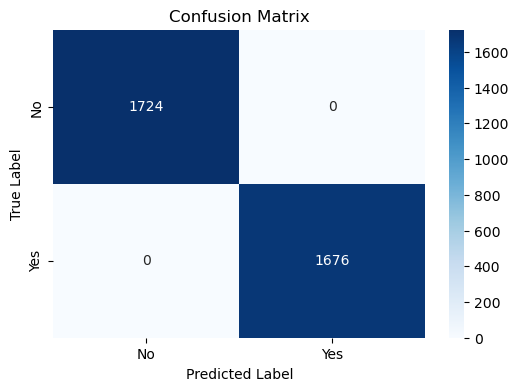

In [45]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Correct way to set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


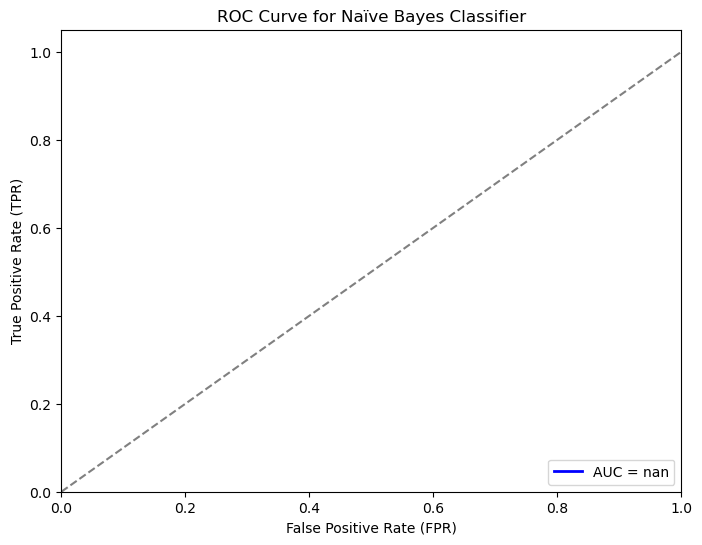

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (loan approved 'Y')
y_probs = classifier.predict_proba(X_test)[:, 1]  # Probabilities for class 'Y'

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Y')

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naïve Bayes Classifier')
plt.legend(loc='lower right')
plt.show()
